<a href="https://colab.research.google.com/github/BhanuHarshaY/CNN-Autoencoders-CIFAR-10/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ASSIGNMENT10 |OBJECT RECOGNITION (CIFAR-10)|AUTHOR: BHANU HARSHA Y | DT: 14/08/25**




In [2]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# I set random seed to 42 for reproducability
np.random.seed(42)
tf.random.set_seed(42)

print("Imported all required libraries!")

Imported all required libraries!


## **Q1) DATA COLLECTION AND UNDERSTANDING THE DATASET:**

In [3]:
# Loading CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#dataset info
print("CIFAR-10 Dataset Overview:")
print(f"Training set shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Data type: {x_train.dtype}")
print(f"Min pixel value: {x_train.min()}")
print(f"Max pixel value: {x_train.max()}")

# Data Normalization
def normalize_images(images):

    return images.astype('float32') / 255.0

x_train_normalized = normalize_images(x_train)
x_test_normalized = normalize_images(x_test)


print("Data After Normalization:")
print(f"Normalized training data type: {x_train_normalized.dtype}")
print(f"Normalized min value: {x_train_normalized.min():.4f}")
print(f"Normalized max value: {x_train_normalized.max():.4f}")
print(f"Normalized mean: {x_train_normalized.mean():.4f}")
print(f"Normalized std: {x_train_normalized.std():.4f}")

#Alternative approach standardization
print("\nAlternstive approach: Standardizartion")
def standardize_images(images):

    mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
    std = np.std(images, axis=(0, 1, 2), keepdims=True)
    return (images - mean) / (std + 1e-7)


x_train_standardized = standardize_images(x_train.astype('float32'))
print(f"\nStandardized mean: {x_train_standardized.mean():.6f}")
print(f"\nStandardized std: {x_train_standardized.std():.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 Dataset Overview:
Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Data type: uint8
Min pixel value: 0
Max pixel value: 255
Data After Normalization:
Normalized training data type: float32
Normalized min value: 0.0000
Normalized max value: 1.0000
Normalized mean: 0.4734
Normalized std: 0.2516

Alternstive approach: Standardizartion

Standardized mean: -0.000002

Standardized std: 1.0000


## **Q1 D&A**
# **Discussion:**
1. I `loaded` the **CIFAR-10 dataset** using a `built-in function(cifar10.load_data())`  from the **Keras library**.
2. **CIFAR-10 dataset** is a subset of *80 million tiny images* and consists of `60,000 32x32 RGB color images`.
3. The **Normalization approach** : I converted the datatype to `float32` and divided every pixel value by 255.0.
4. This scaled the data from its `original range` of `[0, 255]` to a `new range` of `[0.0, 1.0]`.

# **Analysis:**

1. **Training Set Shape:** `50000`.
2. **Test Set Shape:** `10000`.
3. **Data type:** `Unit8`.
4. **What if we train an autoencoder without normalization?**

    Ans: If we trained without an autoencoder normalization, the model would likely `fail to converge`. The `large pixel values` (0-255) would lead to `very large gradients` during `backpropagation`. This can cause `"exploding gradients,"` where the model's weights update so drastically that they become NaN (Not a Number), and the `model might break`.
5. **Alternative technique needed to perform pre-processing step?**

    Ans:Alternative preprocessing step is `standardization`: subtracting the mean and dividing by the standard deviation of the dataset. However, for image data where pixel values have a fixed, known range (0,255), scaling to [0, 1] which I just implemented to showcase the output `Standardized mean: -0.000002` & `Standardized std: 1.0000`. You can also perform  `Rotation, flipping, shifting` (though not typically used for autoencoders).

---
## **Q2) EXPLORATORY DATA ANALYSIS(EDA):**


Sample Images from Each Class in CIFAR-10 dataset: 


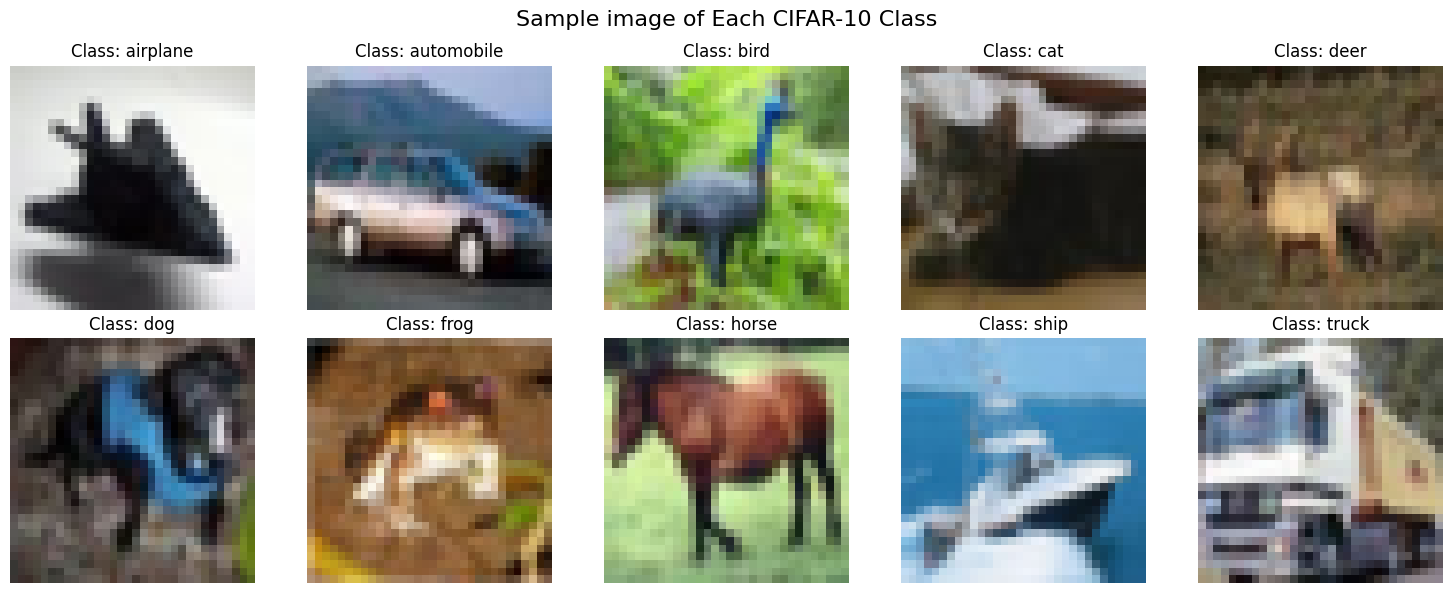

Image size: 32x32 pixels
Colour channels: (3)RGB
Random Sample Grid: 


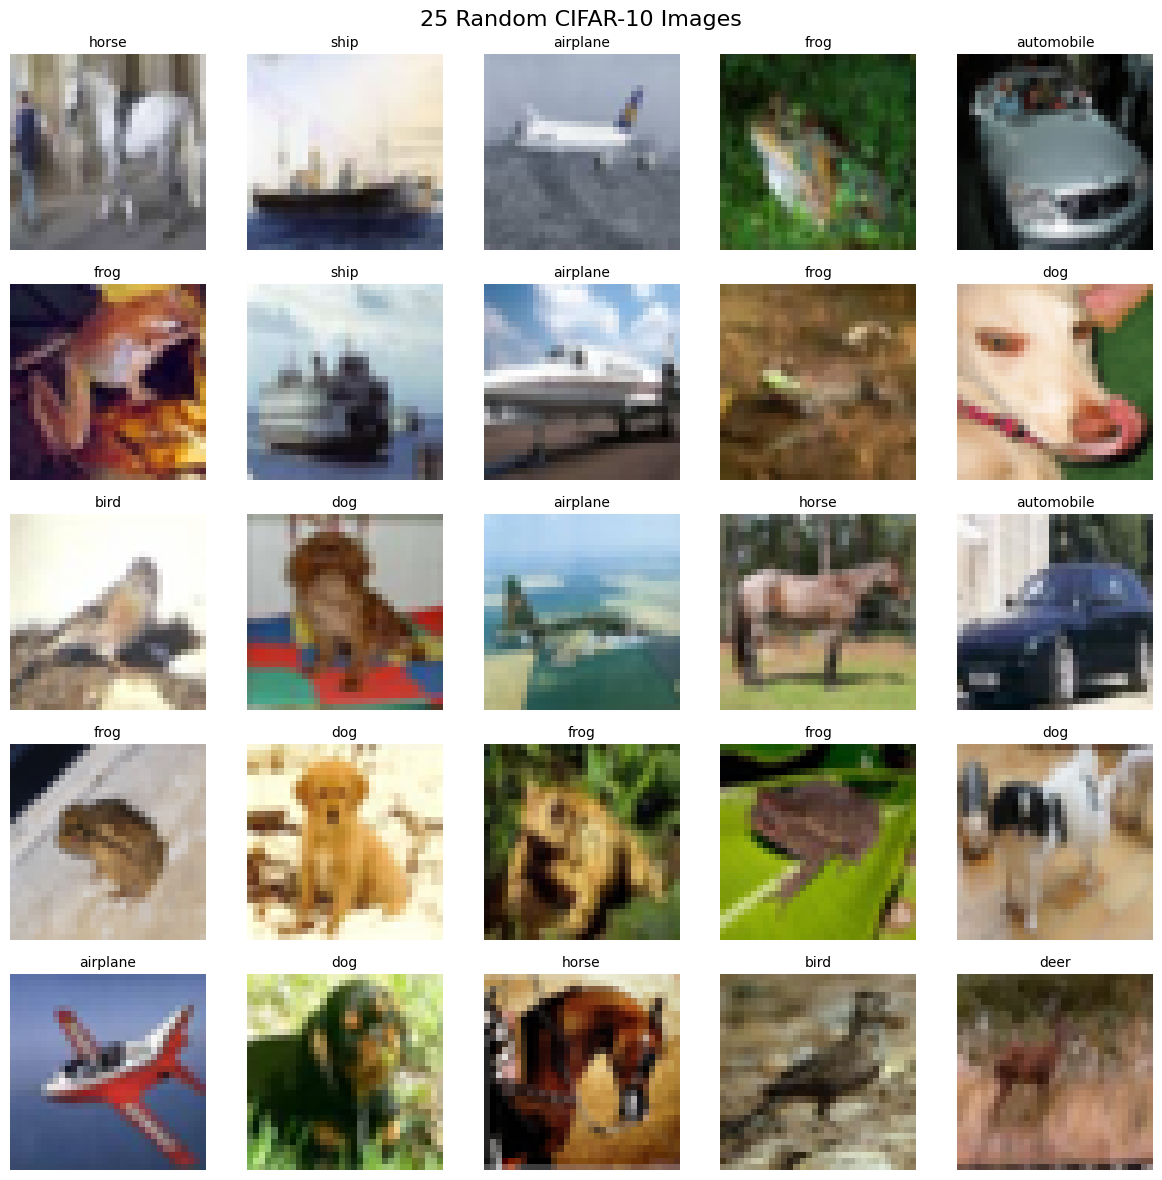

In [4]:
#EDA on CIFAR-10 DATASET
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#Sample imgs of each class
print("Sample Images from Each Class in CIFAR-10 dataset: ")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f'Class: {class_names[i]}')
    axes[i].axis('off')

plt.suptitle('Sample image of Each CIFAR-10 Class', fontsize=16)
plt.tight_layout()
plt.show()

#img characterstics
print("Image size: 32x32 pixels")
print("Colour channels: (3)RGB")

# Plotting grid of 25 random images
print("Random Sample Grid: ")

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

# Selecting 25 imgs
random_indices = np.random.choice(len(x_train), 25, replace=False)

for i, idx in enumerate(random_indices):
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f'{class_names[y_train[idx][0]]}', fontsize=10)
    axes[i].axis('off')

plt.suptitle('25 Random CIFAR-10 Images', fontsize=16)
plt.tight_layout()
plt.show()


## **Q2 D&A**
# **Discussion:**

1. The `first part` of the code  iterates from `0 to 9 (for the 10 classes)`, `finds the first image` in the `training set` that corresponds to each class, and `plots` it with its `correct label`.

2. And, the `second part` of the code gives a `broader overview` of the `dataset` by `plotting a 5x5 grid of 25 randomly selected images` from the `training set`.

# **Analysis:**

1. **Image Size:** `32 x 32 pixels` which is pretty `low resolution` making the object recognition a bit harder.
2. **Background Complexity:**  The `25 images random grid` shows that `many images` have `"noisy"` and `complex backgrounds` (e.g., 'dog' on a colourful mat, 'deer' in a forest ). This makes it `hard for` the `model` to `separate` the `foreground object from the background`.
3. **Color Distributions:** `Color` is  a `key feature`. Some classes are strongly associated with a color (e.g., 'frog' is often green), while others are highly variable ('automobile' and 'truck' can be any color).
4.**My implication**: The low resolution makes some classes very difficult to distinguish (e.g., 'cat' vs. 'dog').